# B11 Circular aperture diffraction
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2021/11/04

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from scipy.interpolate import Rbf
from scipy.signal import argrelextrema
from scipy.io import loadmat

import glob,os

In [2]:
lam = 632.8e-6
b_fh = 79.25e+1

## 1.Fraunhofer

In [3]:
df1 = pd.read_csv('B11-Data\FH.csv')
df1['the'] = 1.22*lam*b_fh/df1['D']
df1['err'] = np.abs((df1['the']-df1['exp'])/df1['the'])
df1

,D,exp,the,err
0,0.15,4.71,4.078818,0.154746
1,0.30,1.93,2.039409,0.053647
2,0.50,1.13,1.223645,0.076530


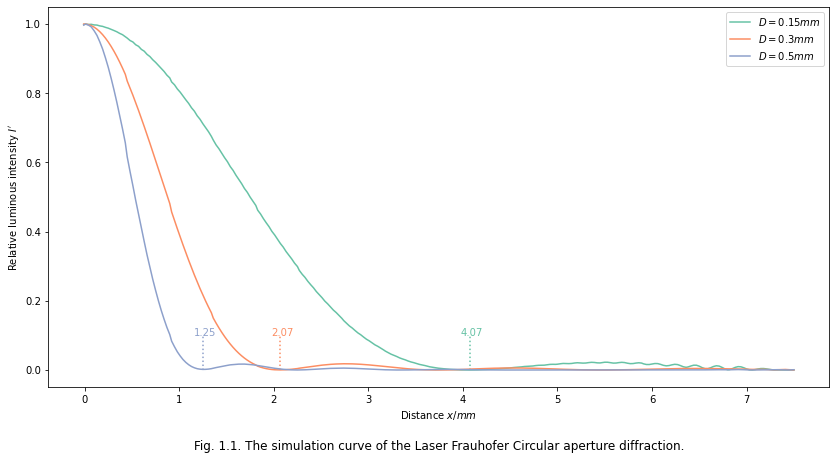

In [6]:
dfLIST = []
path = r'B11-Data'
file = glob.glob(os.path.join(path, 'FH-**.mat'))
for f in file:
    df1 = pd.DataFrame((loadmat(f)['Mod'])**2)
    lim = 7.5
    ticks = tuple(str(-round(x, 2)) for x in np.linspace(-lim, lim, 512))
    df1.columns = tuple(str(round(x, 2)) for x in np.linspace(-lim, lim, 512))
    df1.index = tuple(str(-round(x, 2)) for x in np.linspace(-lim, lim, 512))
    
    df2 = df1.iloc[255, 255:].rename_axis('x').reset_index()
    df2.columns = ['x', 'P']
    df2 = df2.applymap(lambda x:float(x))
    dfLIST.append(df2)

plt.figure(figsize=(14, 7))
for idx in range(len(dfLIST)):
    df = dfLIST[idx]
    DLIST = [0.15,0.3,0.5]
    D = DLIST[idx]
    x_dns = np.linspace(0, 8, 800)
    P0 = df.iloc[0,1]

    p_smu = np.array(df['P'])
    x_smu = np.array(df['x'])


    top_x_smu = x_smu[argrelextrema(p_smu, np.greater, order = 10)]
    top_p_smu = p_smu[argrelextrema(p_smu, np.greater, order = 10)]
    bot_x_smu = x_smu[argrelextrema(p_smu, np.less, order = 10)]


    plt.plot(df['x'], df['P']/np.max(df['P']), color = plt.cm.Set2(idx), label = '$D={}mm$'.format(D))
    plt.legend()

    plt.vlines(bot_x_smu[0], 0, 0.1, ls=':', color = plt.cm.Set2(idx))
    plt.annotate('{:.2f}'.format(bot_x_smu[0]), xy=(bot_x_smu[0]-0.1, 0.1), color=plt.cm.Set2(idx))

plt.xlabel('Distance $x /mm$')
plt.ylabel('Relative luminous intensity $I\'$')
plt.title('Fig. 1.1. The simulation curve of the Laser Frauhofer Circular aperture diffraction.', y=-0.18)
plt.savefig(r'B11-Output\Fig.1.1.png', bbox_inches = 'tight', dpi=300)
